### Import data libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_roc_curve
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

### Exploratory Data Analysis

In [2]:
train_data = pd.read_csv('aug_train.csv') 

In [3]:
train_data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
train_data.shape

(19158, 14)

#### checking missing values

In [10]:
print("Missing values in the train dataset:\n\n",train_data.isna().sum())

Missing values in the train dataset: 
 enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


<AxesSubplot:xlabel='company_type', ylabel='count'>

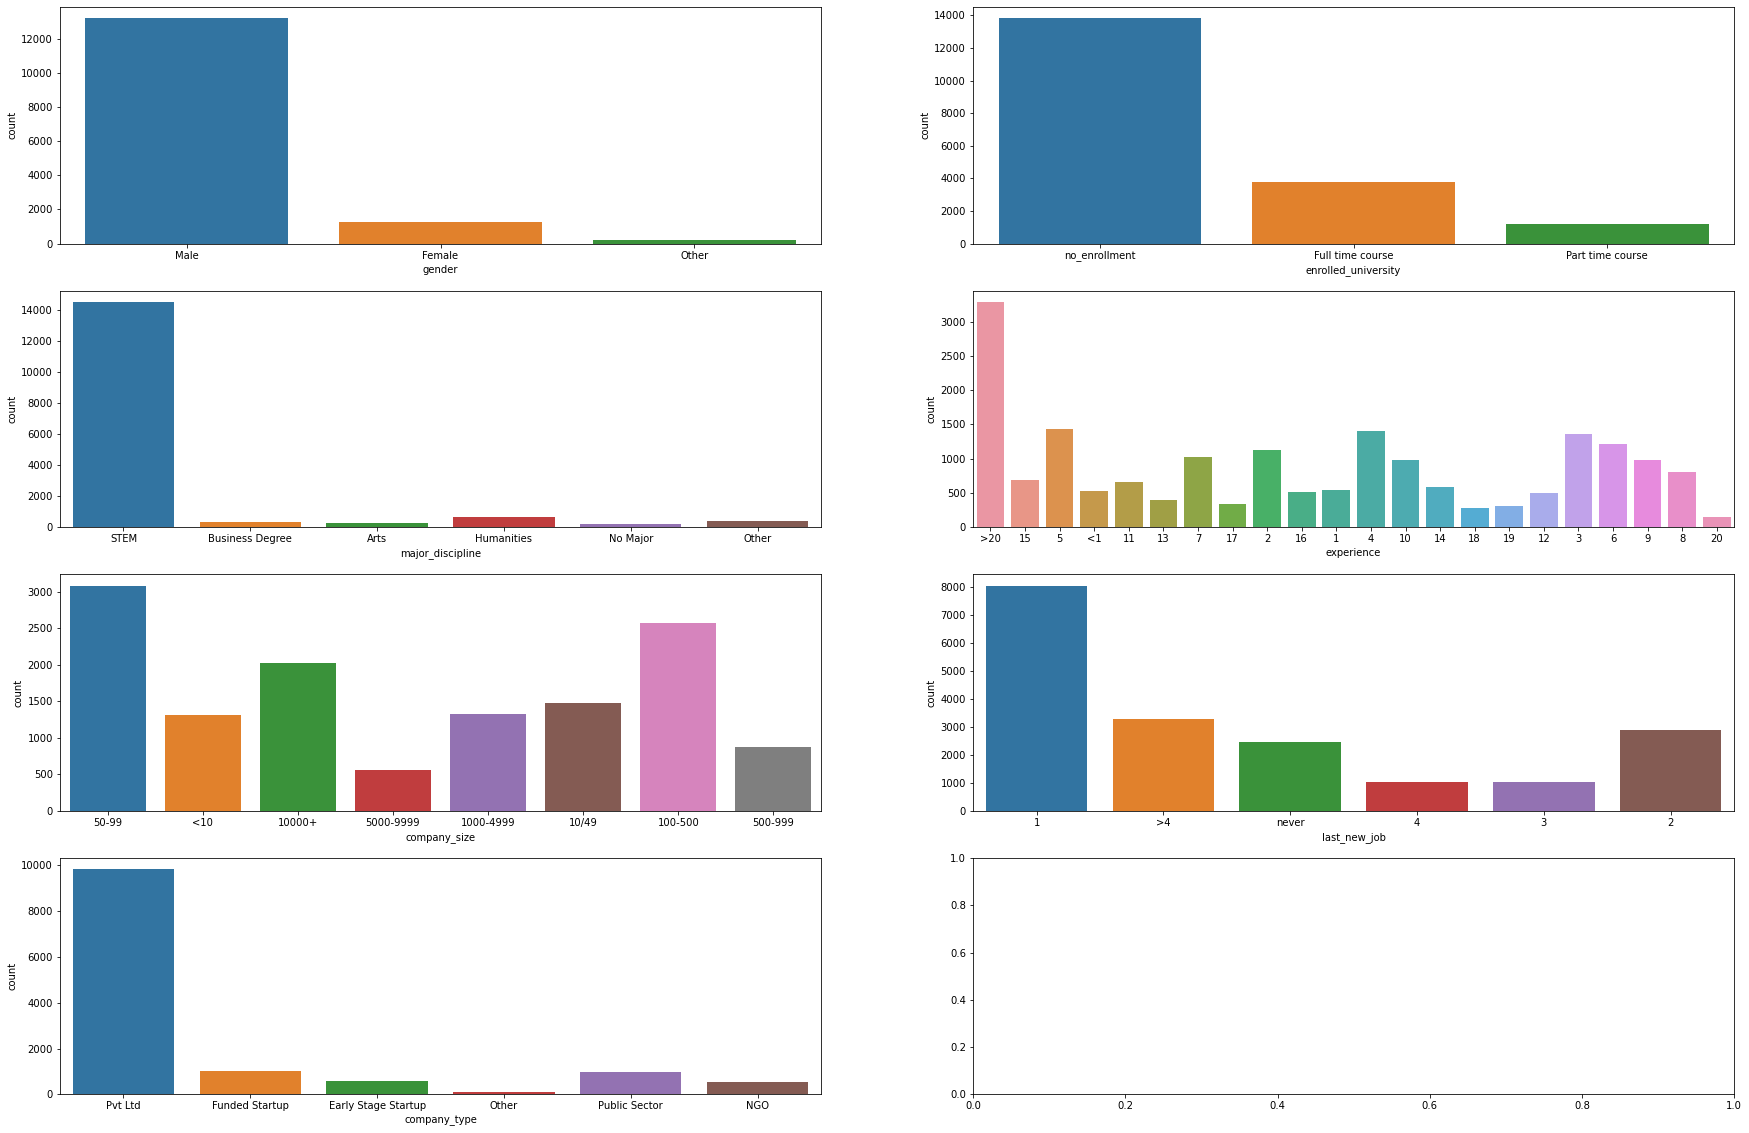

In [11]:
cols_with_nan_data = train_data[['gender', 'enrolled_university', 'major_discipline', 'experience', 'company_size', 'last_new_job', 'company_type', 'education_level']]   
colorblind_palette = sns.color_palette("colorblind")

for i in cols_with_nan_data:
    plt.figure(figsize=(12,6.5)) 
    plt.title(i, fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
    sns.countplot(data = train_data[i], x = cols_with_nan_data[i], palette=colorblind_palette)
    plt.show()

#### We are also interested in whether the target variable is balanced or not.

<AxesSubplot:xlabel='target', ylabel='count'>

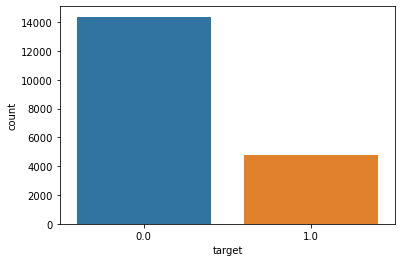

In [12]:
plt.figure(figsize=(12,6))
plt.title("Imbalanced target variable", fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
ax = sns.countplot(x='target', data=train_data)

# data cleaning

### missing values

In [13]:
print("Missing values in the train dataset:", "\n", train.isna().sum())

Missing values in the train dataset: 
 enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64


In [14]:
train.fillna('Unknown', inplace=True)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  19158 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     19158 non-null  object 
 6   education_level         19158 non-null  object 
 7   major_discipline        19158 non-null  object 
 8   experience              19158 non-null  object 
 9   company_size            19158 non-null  object 
 10  company_type            19158 non-null  object 
 11  last_new_job            19158 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [16]:
train.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

### balancing

In [17]:
y=train['target']
# X=train.drop('target',axis=1)
train.drop('target',axis=1,inplace=True)

# y.value_counts()  
# sns.countplot(x='target', data=train)

In [18]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter


rand=RandomOverSampler(random_state=42)
x_ros, y_ros = rand.fit_resample(train, y)
print(f"Imbalanced target class: {Counter(y)} Balanced target class:{Counter(y_ros)}")


Imbalanced target class: Counter({0.0: 14381, 1.0: 4777}) Balanced target class:Counter({1.0: 14381, 0.0: 14381})


In [19]:
train = x_ros
y = y_ros

<AxesSubplot:xlabel='target', ylabel='count'>

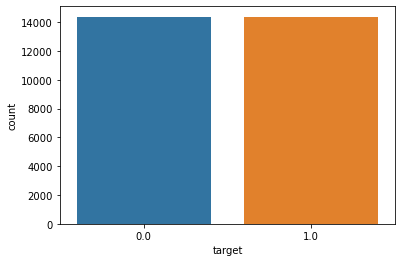

In [20]:
sns.countplot(x=y_ros, data=train) 

### atribute 'city'

In [21]:
city_adjusted = train['city'].str.split("_",expand=True)[1].astype('int64')

In [22]:
train['city'] = city_adjusted

In [23]:
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,8949,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,Unknown,Unknown,1,36
1,29725,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47
2,11561,21,0.624,Unknown,No relevent experience,Full time course,Graduate,STEM,5,Unknown,Unknown,never,83
3,33241,115,0.789,Unknown,No relevent experience,Unknown,Graduate,Business Degree,<1,Unknown,Pvt Ltd,never,52
4,666,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8


### normalization

In [24]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [25]:
ordinal_atributes = ['education_level', 'experience', 'company_size', 'last_new_job']

In [26]:
cardinal_atributes = ['gender', 'relevent_experience', 'enrolled_university', 'major_discipline', 'company_type']

In [27]:
ordinal_pipeline = Pipeline([
    ('OrdinalEncoder',OrdinalEncoder(categories=[
                                    ['Unknown', 'Primary School',  'High School', 'Graduate', 'Masters', 'Phd'],
                                    'Unknown,<1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,>20'.split(','),
                                    ['Unknown','<10', '10/49', '50-99', '100-500', '500-999' ,'1000-4999', '5000-9999', '10000+'],
                                    ['Unknown','1', '2', '3', '4', '>4', 'never']
                                ]))
])

In [28]:
ordinal_pipeline.fit(train[ordinal_atributes])
train[ordinal_atributes] = ordinal_pipeline.transform(train[ordinal_atributes])
train = pd.get_dummies(train,columns=cardinal_atributes)

In [29]:
train.head()

,enrollee_id,city,city_development_index,education_level,experience,company_size,last_new_job,training_hours,gender_Female,gender_Male,...,major_discipline_Other,major_discipline_STEM,major_discipline_Unknown,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Unknown
0,8949,103,0.920,3.0,22.0,0.0,1.0,36,0,1,...,0,1,0,0,0,0,0,0,0,1
1,29725,40,0.776,3.0,16.0,3.0,5.0,47,0,1,...,0,1,0,0,0,0,0,0,1,0
2,11561,21,0.624,3.0,6.0,0.0,6.0,83,0,0,...,0,1,0,0,0,0,0,0,0,1
3,33241,115,0.789,3.0,1.0,0.0,6.0,52,0,0,...,0,0,0,0,0,0,0,0,1,0
4,666,162,0.767,4.0,22.0,3.0,4.0,8,0,1,...,0,1,0,0,1,0,0,0,0,0


In [30]:
train['city']

0        103
1         40
2         21
3        115
4        162
        ... 
28757     21
28758    150
28759     21
28760    103
28761    103
Name: city, Length: 28762, dtype: int64

### split data

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(train, y,test_size=0.2,stratify=y,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((23009, 32), (5753, 32), (23009,), (5753,))

In [33]:
X_train.head()

,enrollee_id,city,city_development_index,education_level,experience,company_size,last_new_job,training_hours,gender_Female,gender_Male,...,major_discipline_Other,major_discipline_STEM,major_discipline_Unknown,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,company_type_Unknown
17886,25793,103,0.920,3.0,9.0,4.0,1.0,52,1,0,...,0,1,0,0,0,0,0,0,1,0
1818,27935,65,0.802,3.0,10.0,4.0,6.0,14,0,1,...,0,1,0,0,0,0,0,0,1,0
19763,11084,21,0.624,3.0,3.0,0.0,6.0,44,0,1,...,0,1,0,0,0,0,0,0,0,1
18365,13206,103,0.920,3.0,4.0,0.0,1.0,11,1,0,...,0,1,0,0,0,0,0,0,1,0
7923,10622,114,0.926,2.0,2.0,4.0,1.0,21,0,0,...,0,0,1,0,0,0,0,1,0,0


### apply model
#### logistic regression

In [34]:
from sklearn.linear_model import LogisticRegression
import seaborn as sn

In [35]:
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression.fit(X_train, y_train)
lr_prediction=logistic_regression.predict(X_test)

In [36]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lr_prediction))

              precision    recall  f1-score   support

         0.0       0.63      0.62      0.62      2877
         1.0       0.62      0.63      0.63      2876

    accuracy                           0.62      5753
   macro avg       0.62      0.62      0.62      5753
weighted avg       0.62      0.62      0.62      5753



In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lr_prediction)

0.6243698939683643

In [38]:
from collections import Counter
Counter(y_test)

Counter({1.0: 2876, 0.0: 2877})

In [39]:
from sklearn import metrics


fpr, tpr, thresholds = metrics.roc_curve(y_test, lr_prediction, pos_label=2)

C:\Users\mbajic\Anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:949: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


In [40]:
print(fpr)

[0.         0.50252042 1.        ]


In [41]:
print(tpr)

[nan nan nan]


In [42]:
print(thresholds)

[2. 1. 0.]
